## Step 1: TCGA and PanCancer Dataset Preprocessing
Take the PanCancer dataset and filter to only keep the +2 _(Amplifications (AMP))_ and the -2 _(Homozygous Deletions (HOMDEL))_

### Download Necessary Files
Dataset Links:   
https://www.cbioportal.org/study/summary?id=ov_tcga_pan_can_atlas_2018 - CNV and Proteomics Info 


https://www.linkedomics.org/data_download/CPTAC-pancan-OV/ - CNV and Proteomics _(to be explored to expand dataset)_

In [2]:
#Unzip gzipped files
!gunzip /Users/faith/Documents/GitHub/bioslate-hgsoc-core/database_files/ov_tcga_pan_can_atlas_2018.tar.gz

In [4]:
#Extract tar file.
!tar -xvf /Users/faith/Documents/GitHub/bioslate-hgsoc-core/database_files/ov_tcga_pan_can_atlas_2018.tar -C /Users/faith/Documents/GitHub/bioslate-hgsoc-core/database_files/

x ov_tcga_pan_can_atlas_2018/
x ov_tcga_pan_can_atlas_2018/meta_resource_definition.txt
x ov_tcga_pan_can_atlas_2018/data_log2_cna.txt


x ov_tcga_pan_can_atlas_2018/meta_timeline_treatment.txt
x ov_tcga_pan_can_atlas_2018/data_clinical_supp_hypoxia.txt
x ov_tcga_pan_can_atlas_2018/meta_resource_patient.txt
x ov_tcga_pan_can_atlas_2018/data_clinical_sample.txt
x ov_tcga_pan_can_atlas_2018/data_phosphoprotein_quantification.txt
x ov_tcga_pan_can_atlas_2018/meta_study.txt
x ov_tcga_pan_can_atlas_2018/meta_mrna_seq_v2_rsem.txt
x ov_tcga_pan_can_atlas_2018/LICENSE
x ov_tcga_pan_can_atlas_2018/data_timeline_status.txt
x ov_tcga_pan_can_atlas_2018/data_resource_patient.txt
x ov_tcga_pan_can_atlas_2018/data_genetic_ancestry.txt
x ov_tcga_pan_can_atlas_2018/meta_genetic_ancestry.txt
x ov_tcga_pan_can_atlas_2018/meta_armlevel_cna.txt
x ov_tcga_pan_can_atlas_2018/data_timeline_treatment.txt
x ov_tcga_pan_can_atlas_2018/data_methylation_hm27_hm450_merged.txt
x ov_tcga_pan_can_atlas_2018/data_armlevel_cna.txt
x ov_tcga_pan_can_atlas_2018/meta_clinical_patient.txt
x ov_tcga_pan_can_atlas_2018/meta_log2_cna.txt
x ov_tcga_pan_can_atl

### 🧬 What is a GISTIC Score?

**GISTIC** (Genomic Identification of Significant Targets in Cancer) is a method used to identify regions of the genome that are **significantly amplified or deleted** across a set of cancer samples.

Each **GISTIC score** represents the **copy number status of a gene** in a given sample:

| GISTIC Score | Interpretation                  |
| ------------ | ------------------------------- |
| **-2**       | Deep (homozygous) deletion      |
| **-1**       | Shallow (heterozygous) deletion |
| **0**        | Diploid (normal copy number)    |
| **+1**       | Low-level gain                  |
| **+2**       | High-level amplification        |

These scores help identify **copy number alterations (CNAs)** that may drive cancer progression or serve as **therapeutic targets or biomarkers**.


In [19]:
import pandas as pd

# Load the file with tab as delimiter
cna_df = pd.read_csv("/Users/faith/Documents/GitHub/bioslate-hgsoc-core/database_files/ov_tcga_pan_can_atlas_2018/data_cna.txt", sep='\t')

# Set Hugo_Symbol as index
cna_df.set_index("Hugo_Symbol", inplace=True)

# Drop Entrez_Gene_Id BEFORE filtering — since it's not a sample and can mess with the filtering
cna_df.drop(columns=["Entrez_Gene_Id"], inplace=True)

cna_df.head()

,TCGA-04-1331-01,TCGA-04-1332-01,TCGA-04-1335-01,TCGA-04-1336-01,TCGA-04-1337-01,TCGA-04-1338-01,TCGA-04-1341-01,TCGA-04-1342-01,TCGA-04-1343-01,TCGA-04-1346-01,...,TCGA-72-4235-01,TCGA-72-4236-01,TCGA-72-4237-01,TCGA-72-4238-01,TCGA-72-4240-01,TCGA-72-4241-01,TCGA-OY-A56P-01,TCGA-OY-A56Q-01,TCGA-VG-A8LO-01,TCGA-WR-A838-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
ACAP3,-1,0,-1,1,0,-1,-1,0,1,-1,...,0,0,2,0,0,1,1,0,1,-1
ACTRT2,-1,0,-1,1,0,-1,-1,0,1,-1,...,0,0,2,0,0,1,1,0,1,-1
AGRN,-1,0,-1,1,0,-1,-1,0,1,-1,...,0,0,2,0,0,1,1,0,1,-1
ANKRD65,-1,0,-1,1,0,-1,-1,0,1,-1,...,0,0,2,0,0,1,1,0,1,-1
ATAD3A,-1,0,-1,1,0,-1,-1,0,1,-1,...,0,0,2,0,0,1,1,0,1,-1


### 🔍 Why Copy Number Variations (CNVs) Are Difficult to Interpret in Cancer Data
> Copy number variations (CNVs) such as deletions or amplifications can be challenging to interpret accurately in tumour samples due to the heterogeneous nature of cancer tissue. A tumour biopsy typically contains a mixture of both cancerous and normal (non-cancerous) cells. Because of this, CNV estimates (like those from GISTIC analyses) represent an average signal across the entire cell population, not just the tumour cells.

> For example, a GISTIC score of -2 or +2 may indicate a strong deletion or amplification, respectively, but it doesn’t necessarily mean that every cell in the sample carries that alteration. Instead, it reflects what is observed on average. If the tumour purity is low (i.e., many normal cells are present), even a biologically significant CNV may appear less extreme.

> This tumour heterogeneity introduces noise and uncertainty in CNV interpretation, which researchers must consider when linking copy number events to gene dependencies or therapeutic vulnerabilities.

In [20]:
# Export to CSV
cna_df.to_csv("/Users/faith/Documents/GitHub/bioslate-hgsoc-core/results/full_cna.csv")

In [40]:
# Count how many cell lines have +2 or -2 per gene
amplified_counts = (cna_df == 2).sum(axis=1)
deleted_counts = (cna_df == -2).sum(axis=1)
# axis = 1 is the columns (i.e. what we want)

# Keep genes amplified or deleted in ≥5 cell lines
amp_genes = amplified_counts[amplified_counts >= 5].index
del_genes = deleted_counts[deleted_counts >= 5].index

# Final candidate genes = union of both
candidate_genes = amp_genes.union(del_genes)

In [34]:
amplified_counts

Hugo_Symbol
ACAP3             11
ACTRT2            11
AGRN              11
ANKRD65           11
ATAD3A            11
                  ..
hsa-mir-513c      14
hsa-mir-513b      14
hsa-mir-513a-1    14
hsa-mir-513a-2    14
hsa-mir-224       20
Length: 25128, dtype: int64

In [35]:
deleted_counts

Hugo_Symbol
ACAP3             6
ACTRT2            6
AGRN              6
ANKRD65           6
ATAD3A            6
                 ..
hsa-mir-513c      4
hsa-mir-513b      4
hsa-mir-513a-1    4
hsa-mir-513a-2    4
hsa-mir-224       3
Length: 25128, dtype: int64

In [38]:
amp_genes

# Length = 18102

Index(['ACAP3', 'ACTRT2', 'AGRN', 'ANKRD65', 'ATAD3A', 'ATAD3B', 'ATAD3C',
       'AURKAIP1', 'B3GALT6', 'C1orf159',
       ...
       'hsa-mir-649', 'hsa-mir-1308', 'hsa-mir-548f-5', 'hsa-mir-362',
       'hsa-mir-220a', 'hsa-mir-513c', 'hsa-mir-513b', 'hsa-mir-513a-1',
       'hsa-mir-513a-2', 'hsa-mir-224'],
      dtype='object', name='Hugo_Symbol', length=18102)

In [39]:
del_genes

# Length = 4759
# Much less HOMDEL genes which is what we saw in https://www.cbioportal.org/study/summary?id=ov_tcga_pan_can_atlas_2018. Good sign

Index(['ACAP3', 'ACTRT2', 'AGRN', 'ANKRD65', 'ATAD3A', 'ATAD3B', 'ATAD3C',
       'AURKAIP1', 'B3GALT6', 'C1orf159',
       ...
       'hsa-mir-1268', 'hsa-mir-3118-4', 'hsa-mir-3118-6', 'hsa-mir-548h-3',
       'hsa-mir-924', 'hsa-mir-1302-11', 'hsa-mir-1274b', 'hsa-mir-3118-5',
       'hsa-mir-548f-5', 'hsa-mir-548m'],
      dtype='object', name='Hugo_Symbol', length=4759)

In [ ]:
candidate_genes

# Length went from 25128 to 20996. Filtering successful.
# not 22861 because that means 1,865 genes are present in both amp_genes and del_genes. .union removes duplicates
# len(amp_genes) + len(del_genes) ≠ len(candidate_genes)

## Step 2: Align with Proteomic Data
Filter by checking which of these genes actually express a protein using proteomics data and only retaining those.

In [21]:
# Load proteomics data
proteomics_df = pd.read_csv("/Users/faith/Documents/GitHub/bioslate-hgsoc-core/database_files/ov_tcga_pan_can_atlas_2018/data_protein_quantification.txt", sep="\t", index_col=0)
# We've named the index as the RPPA column.

In [24]:
# Extract gene symbol from 'GENE|PROTEIN' format
proteomics_df.index = proteomics_df.index.str.split("|").str[0]
# take that index alter it by converting it to a string (just in case) and stripping and any extra space at the end. 
# Just keep the first word "str[0]".

proteomics_df.to_csv("/Users/faith/Documents/GitHub/bioslate-hgsoc-core/results/proteomics.csv")

In [41]:
proteomics_df

,TCGA-09-1664-01,TCGA-61-2094-01,TCGA-25-1312-01,TCGA-13-1409-01,TCGA-24-1416-01,TCGA-29-1769-01,TCGA-13-1489-01,TCGA-13-1482-01,TCGA-13-1504-01,TCGA-13-1492-01,...,TCGA-29-1710-01,TCGA-36-1571-01,TCGA-24-1553-01,TCGA-13-1487-01,TCGA-25-2396-01,TCGA-36-2545-01,TCGA-25-2404-01,TCGA-24-1430-01,TCGA-29-1697-01,TCGA-13-2060-01
Composite.Element.REF,,,,,,,,,,,,,,,,,,,,,
A1BG,0.5140,0.2434,0.1119,-0.2268,0.0623,-0.2158,0.2008,-0.0495,-0.3370,-0.6540,...,0.2651,0.4154,0.1935,-0.2863,0.3823,0.1159,0.2885,0.1191,-0.6946,-0.2712
A2M,0.3407,0.2226,-0.2970,-0.4302,-0.6989,-0.2652,-0.0340,-0.0236,-0.4909,-0.4403,...,0.5182,-0.1429,-0.1813,-0.8313,0.1607,0.3759,0.0042,0.2202,-1.1285,-0.7819
A2ML1,NaN,NaN,NaN,-1.2262,-0.3014,-0.2814,NaN,NaN,NaN,-2.9796,...,NaN,NaN,-0.3396,-1.4378,NaN,NaN,-2.0599,-1.9273,-2.0011,-2.2560
AAAS,-0.0378,0.1332,0.2766,0.1695,0.0511,-0.0517,-0.3262,-0.1185,-0.3312,0.2553,...,-0.1064,0.1663,-0.0717,0.1814,-0.0451,-0.1877,-0.1577,-0.2845,-0.1803,0.1553
AACS,-0.1035,0.1422,0.3615,-0.3909,0.0620,-0.0070,-0.3391,-0.7220,0.1102,-0.4460,...,-0.3203,0.4815,-0.3730,-0.3770,-0.2835,0.6528,-0.0393,0.2883,0.9117,0.3982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZW10,0.0532,0.1914,0.3456,0.0319,0.0565,0.0520,0.4471,-0.1148,0.1694,0.3669,...,0.0854,0.0850,-0.0168,0.3961,0.0634,0.0517,-0.0305,0.0009,0.1594,0.2482
ZWILCH,0.0116,0.2462,-0.0178,-0.2178,0.0715,0.3121,0.3708,-0.3109,0.1405,0.9490,...,-0.3034,0.2811,-0.2843,0.1801,NaN,NaN,0.2688,0.0013,0.5584,0.1653
ZYG11B,-0.2315,-0.2866,0.1672,0.0514,-0.2887,-0.0612,NaN,NaN,NaN,NaN,...,-0.1454,-0.3582,-0.0657,0.1292,0.1391,0.2592,-0.0866,-0.0939,1.4596,0.1108


In [42]:
common_genes = candidate_genes.intersection(proteomics_df.index)
common_genes

# Take the genes that were amplified or deleted in ≥5 cell lines (candidate_genes)
# Keep only those also found in the proteomics data (proteomics_df.index) 

# length=6428

Index(['A1BG', 'A2M', 'A2ML1', 'AACS', 'AAGAB', 'AAK1', 'AAMDC', 'AAR2',
       'AARS', 'AARS2',
       ...
       'ZNHIT6', 'ZNRF2', 'ZPR1', 'ZRANB2', 'ZSCAN18', 'ZSWIM8', 'ZW10',
       'ZYG11B', 'ZYX', 'ZZEF1'],
      dtype='object', length=6428)

In [43]:
cna_filtered = cna_df.loc[common_genes]
cna_filtered

# Access rows (and optionally columns) by label.
# It stands for "location by label".

# Returns the CNA data only for the genes that are present in both the CNA and proteomics datasets.
# We have now successfully filtered the genes that also result in a change in protein.

,TCGA-04-1331-01,TCGA-04-1332-01,TCGA-04-1335-01,TCGA-04-1336-01,TCGA-04-1337-01,TCGA-04-1338-01,TCGA-04-1341-01,TCGA-04-1342-01,TCGA-04-1343-01,TCGA-04-1346-01,...,TCGA-72-4235-01,TCGA-72-4236-01,TCGA-72-4237-01,TCGA-72-4238-01,TCGA-72-4240-01,TCGA-72-4241-01,TCGA-OY-A56P-01,TCGA-OY-A56Q-01,TCGA-VG-A8LO-01,TCGA-WR-A838-01
A1BG,0,1,-1,-1,0,1,-1,0,1,-1,...,-1,0,-1,0,-1,-1,-1,-1,0,0
A2M,0,1,-1,-1,-1,1,1,-1,0,1,...,1,1,1,-1,0,1,1,1,0,1
A2ML1,0,1,-1,-1,-1,1,1,-1,0,1,...,1,1,1,-1,0,1,1,1,0,1
AACS,0,1,-1,0,1,1,1,1,0,0,...,1,0,1,1,0,-1,1,0,0,0
AAGAB,-1,0,0,0,0,-1,-1,-1,0,0,...,1,-1,0,0,-1,0,-1,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSWIM8,-1,0,0,0,0,2,1,0,-1,0,...,0,-1,0,0,-1,1,-1,1,0,1
ZW10,-1,1,-1,0,0,2,-1,-1,1,1,...,1,0,0,-1,0,1,1,-1,1,-1
ZYG11B,2,-1,0,1,0,1,-1,1,1,1,...,0,0,1,0,0,0,1,0,0,0
ZYX,0,0,0,0,1,2,1,1,0,0,...,1,0,0,0,1,1,1,1,0,1


In [44]:
prot_filtered = proteomics_df.loc[common_genes]
prot_filtered

,TCGA-09-1664-01,TCGA-61-2094-01,TCGA-25-1312-01,TCGA-13-1409-01,TCGA-24-1416-01,TCGA-29-1769-01,TCGA-13-1489-01,TCGA-13-1482-01,TCGA-13-1504-01,TCGA-13-1492-01,...,TCGA-29-1710-01,TCGA-36-1571-01,TCGA-24-1553-01,TCGA-13-1487-01,TCGA-25-2396-01,TCGA-36-2545-01,TCGA-25-2404-01,TCGA-24-1430-01,TCGA-29-1697-01,TCGA-13-2060-01
A1BG,0.5140,0.2434,0.1119,-0.2268,0.0623,-0.2158,0.2008,-0.0495,-0.3370,-0.6540,...,0.2651,0.4154,0.1935,-0.2863,0.3823,0.1159,0.2885,0.1191,-0.6946,-0.2712
A2M,0.3407,0.2226,-0.2970,-0.4302,-0.6989,-0.2652,-0.0340,-0.0236,-0.4909,-0.4403,...,0.5182,-0.1429,-0.1813,-0.8313,0.1607,0.3759,0.0042,0.2202,-1.1285,-0.7819
A2ML1,NaN,NaN,NaN,-1.2262,-0.3014,-0.2814,NaN,NaN,NaN,-2.9796,...,NaN,NaN,-0.3396,-1.4378,NaN,NaN,-2.0599,-1.9273,-2.0011,-2.2560
AACS,-0.1035,0.1422,0.3615,-0.3909,0.0620,-0.0070,-0.3391,-0.7220,0.1102,-0.4460,...,-0.3203,0.4815,-0.3730,-0.3770,-0.2835,0.6528,-0.0393,0.2883,0.9117,0.3982
AAGAB,NaN,NaN,NaN,-0.0819,0.2410,-0.0569,0.5621,-0.0935,0.0918,0.8220,...,-0.1451,0.3490,-0.4276,0.0067,-0.7295,-0.4441,0.0078,-0.3234,1.0101,0.1301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSWIM8,0.2774,0.5182,0.1608,0.1823,-0.0645,0.1018,0.4105,0.0920,0.2412,0.2109,...,0.0668,0.1099,-0.0779,-0.1982,NaN,NaN,0.0824,0.1133,0.0452,0.0607
ZW10,0.0532,0.1914,0.3456,0.0319,0.0565,0.0520,0.4471,-0.1148,0.1694,0.3669,...,0.0854,0.0850,-0.0168,0.3961,0.0634,0.0517,-0.0305,0.0009,0.1594,0.2482
ZYG11B,-0.2315,-0.2866,0.1672,0.0514,-0.2887,-0.0612,NaN,NaN,NaN,NaN,...,-0.1454,-0.3582,-0.0657,0.1292,0.1391,0.2592,-0.0866,-0.0939,1.4596,0.1108
ZYX,-0.2241,-0.2099,-0.0946,-0.1891,-0.4127,0.2855,-0.1842,0.4453,0.1453,-0.6954,...,0.1809,0.0419,-0.1475,0.2368,0.3591,0.2547,0.2466,0.3180,-0.1012,0.3579


## Step 3: Statistical Modelling
Do both a Logisitic Regression of Protein A (arbitrary protein) for a Copy Number A (same gene for Protein A) for each score to see if there is a trend. 

#### Why Does `data_cna.txt` and `data_protein_quantification.txt` have different number of samples?

The CNA and proteomics data come from the same TCGA download, but:

🔍 Why do they have different sample counts?
CNA data (from data_cna.txt) covers almost all tumour samples — TCGA profiled nearly everyone for CNVs.

Proteomics data (from data_protein_quantification.txt) is based on RPPA or mass spec, which was only done on a subset of patients — usually ~100–150 samples per cancer type.

Hence, the different in number of columns 121 =/ 562.

In [60]:
# Gene expression and CNA data use the same sample IDs
shared_samples = cna_filtered.columns.intersection(prot_filtered.columns)

In [61]:
shared_samples

Index(['TCGA-09-1664-01', 'TCGA-13-1404-01', 'TCGA-13-1409-01',
       'TCGA-13-1410-01', 'TCGA-13-1482-01', 'TCGA-13-1483-01',
       'TCGA-13-1485-01', 'TCGA-13-1487-01', 'TCGA-13-1488-01',
       'TCGA-13-1489-01',
       ...
       'TCGA-61-1911-01', 'TCGA-61-1914-01', 'TCGA-61-1915-01',
       'TCGA-61-1918-01', 'TCGA-61-1995-01', 'TCGA-61-2008-01',
       'TCGA-61-2087-01', 'TCGA-61-2088-01', 'TCGA-61-2094-01',
       'TCGA-61-2613-01'],
      dtype='object', length=119)

In [56]:
# Collect all gene-wise data into one DataFrame
all_data = []

for gene in common_genes:
    cna_vals = cna_filtered.loc[gene]
    prot_vals = prot_filtered.loc[gene]

cna_vals

TCGA-04-1331-01   -1
TCGA-04-1332-01    0
TCGA-04-1335-01   -1
TCGA-04-1336-01   -1
TCGA-04-1337-01   -1
                  ..
TCGA-72-4241-01   -1
TCGA-OY-A56P-01   -1
TCGA-OY-A56Q-01   -1
TCGA-VG-A8LO-01   -1
TCGA-WR-A838-01    1
Name: ZZEF1, Length: 572, dtype: int64

In [59]:
prot_vals

TCGA-09-1664-01    0.1437
TCGA-61-2094-01    0.3460
TCGA-25-1312-01   -0.1734
TCGA-13-1409-01   -0.5105
TCGA-24-1416-01   -0.3128
                    ...  
TCGA-36-2545-01    0.1759
TCGA-25-2404-01    0.0461
TCGA-24-1430-01    0.1597
TCGA-29-1697-01    0.3809
TCGA-13-2060-01    0.3116
Name: ZZEF1, Length: 121, dtype: float64

In [76]:
# Collect all gene-wise data into one long DataFrame
all_data = []

for gene in common_genes:
    cna_vals = cna_filtered.loc[gene, shared_samples]
    prot_vals = prot_filtered.loc[gene, shared_samples]

    for sample in shared_samples:
        all_data.append({
            "Gene": gene,
            "Sample": sample,
            "CNA": cna_vals[sample],
            "Protein": prot_vals[sample]
        })

merged_df = pd.DataFrame(all_data)

merged_df = merged_df.dropna(subset=["CNA", "Protein"])
merged_df.to_csv("/Users/faith/Documents/GitHub/bioslate-hgsoc-core/results/cnv_prot_boxplot.csv")

In [77]:
merged_df
# ≈ 6437 genes × 119 samples ≈ 764,903 rows

,Gene,Sample,CNA,Protein
0,A1BG,TCGA-09-1664-01,-1,0.5140
1,A1BG,TCGA-13-1404-01,-1,-0.4481
2,A1BG,TCGA-13-1409-01,0,-0.2268
3,A1BG,TCGA-13-1410-01,1,-0.0298
4,A1BG,TCGA-13-1482-01,1,-0.0495
...,...,...,...,...
764927,ZZEF1,TCGA-61-2008-01,0,0.0268
764928,ZZEF1,TCGA-61-2087-01,0,0.1333
764929,ZZEF1,TCGA-61-2088-01,-1,-0.2916
764930,ZZEF1,TCGA-61-2094-01,-1,0.3460


/var/folders/09/0r9l07110lg5nj9ndgsx9kl80000gn/T/ipykernel_70565/1327496986.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CNA",


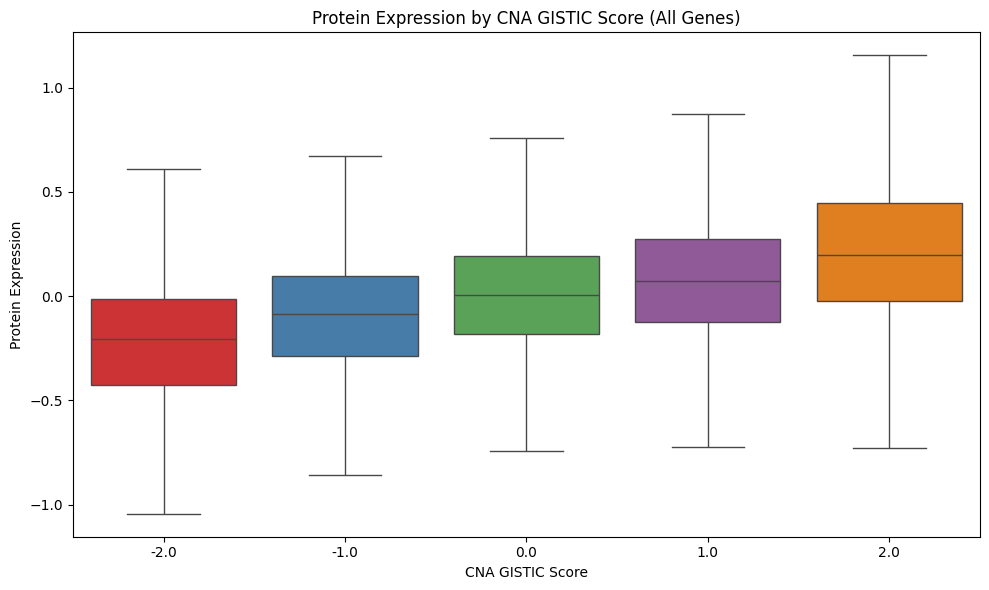

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x="CNA", 
            y="Protein", 
            data=merged_df, 
            palette="Set1",
            showfliers=False)

plt.title("Protein Expression by CNA GISTIC Score (All Genes)")
plt.xlabel("CNA GISTIC Score")
plt.ylabel("Protein Expression")
plt.tight_layout()
plt.show()

### 📊 Statistical Measures for CNA vs Protein Expression

| **Statistic**       | **What It Tells You**                                                         | **Why It's Useful in This Case**                                                                  |
| ------------------- | ----------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------- |
| **t-statistic**     | The standardised difference between two group means, accounting for variance. | Shows how strongly CNA = ±2 differs from CNA = 0 in protein expression. Larger = more separation. |
| **p-value**         | Probability the observed difference happened by chance.                       | Tells you if the difference is statistically significant (typically p < 0.05).                    |
| **Cohen's d**       | A standardised **effect size**: how big the difference is in practical terms. | Quantifies how meaningful the difference is, even when p-value is very small.                    |

--- 

* **p-value** → Is the change significant?
* **t-statistic** → How strong is the separation?
* **Cohen’s d** → Is the difference biologically meaningful?

In [91]:
from scipy.stats import ttest_ind

# Make sure CNA is int
merged_df = merged_df.dropna(subset=["CNA", "Protein"])
merged_df["CNA"] = merged_df["CNA"].astype(int)

# Subsets
group_0 = merged_df[merged_df["CNA"] == 0]["Protein"]
group_amp = merged_df[merged_df["CNA"] == 2]["Protein"]
group_del = merged_df[merged_df["CNA"] == -2]["Protein"]

# T-tests
t_stat_amp, p_val_amp = ttest_ind(group_amp, group_0, equal_var=False)
t_stat_del, p_val_del = ttest_ind(group_del, group_0, equal_var=False)

print(f"CNA +2 vs 0 → t = {t_stat_amp:.3f}, p = {p_val_amp:.3e}")
print(f"CNA -2 vs 0 → t = {t_stat_del:.3f}, p = {p_val_del:.3e}")

CNA +2 vs 0 → t = 71.025, p = 0.000e+00
CNA -2 vs 0 → t = -36.384, p = 3.149e-251


### 📊 T-Test Results Interpretation

| Comparison  | t-statistic | p-value       | Interpretation                                                                         |
| ----------- | ----------- | ------------- | -------------------------------------------------------------------------------------- |
| **+2 vs 0** | 71.025      | 0     | Strong evidence that amplification is associated with **increased** protein expression |
| **−2 vs 0** | -36.384     | 3.15 × 10⁻²⁵¹ | Strong evidence that deep deletion is associated with **decreased** protein expression |


### 📐 **Cohen’s d (Effect Size) Formula**

Cohen’s *d* measures the **standardised difference between two means**:

$$
d = \frac{\bar{x}_1 - \bar{x}_2}{s_p}
$$

Where:

* $\bar{x}_1$, $\bar{x}_2$ = means of group 1 and group 2
* $s_p$ = pooled standard deviation:

$$
s_p = \sqrt{\frac{(n_1 - 1) s_1^2 + (n_2 - 1) s_2^2}{n_1 + n_2 - 2}}
$$

* $s_1$, $s_2$ = standard deviations of group 1 and group 2
* $n_1$, $n_2$ = sample sizes of each group

In [95]:
def cohens_d(x, y):
    nx = len(x)
    ny = len(y)
    pooled_std = ((nx - 1) * x.std(ddof=1)**2 + (ny - 1) * y.std(ddof=1)**2) / (nx + ny - 2)
    return (x.mean() - y.mean()) / pooled_std**0.5

d_amp = cohens_d(group_amp, group_0)
d_del = cohens_d(group_del, group_0)

print(f"Cohen's d (+2 vs 0): {d_amp:.3f}")
print(f"Cohen's d (-2 vs 0): {d_del:.3f}")

Cohen's d (+2 vs 0): 0.554
Cohen's d (-2 vs 0): -0.585


### 📊 **Cohen’s d Effect Size Thresholds**
https://www.sciencedirect.com/science/article/abs/pii/S0191886916308194?via%3Dihub

| **Cohen’s *d*** | **Effect Size** | **Interpretation**                                  |
| --------------- | --------------- | --------------------------------------------------- |
| **0.0 – 0.19**  | Very small      | Almost no difference between groups                 |
| **0.2 – 0.49**  | Small           | Small, but possibly meaningful                      |
| **0.5 – 0.79**  | Medium          | Moderate difference, likely noticeable biologically |
| **0.8 – 1.19**  | Large           | Strong difference                                   |
| **1.2 – 1.99**  | Very large      | Very strong, highly meaningful                      |
| **≥ 2.0**       | Huge            | Groups are almost completely distinct               |

---

### (CNA vs Protein Expression):

* **d ≈ 0.2–0.4** might be statistically significant but not biologically meaningful.
* **d ≥ 0.5** is more compelling, it suggests CNAs meaningfully affect protein levels.
* **d ≥ 0.8** is a strong signal and worth reporting as a potential biomarker effect.

- The magnitude of |d| (absolute value) is what determines effect size strength
- The sign gives you direction

### 📊 **Cohen’s d Results Interpretation**

| Comparison  | Cohen’s *d* | Effect Size | Interpretation                                                              |
| ----------- | ----------- | ----------- | --------------------------------------------------------------------------- |
| **+2 vs 0** | **0.554**   | Medium      | Amplification is associated with **higher** protein expression, as expected |
| **-2 vs 0** | **-0.585**  | Medium      | Deep deletion is associated with **lower** protein expression, as expected  |


In [94]:
common_genes.to_series().to_csv(
    "/Users/faith/Documents/GitHub/bioslate-hgsoc-core/results/final_candidate_biomarkers.csv",
    index=False,
    header=["Gene"]
)